In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
import networkx as nx
from itertools import combinations
import pandas_profiling

import seaborn as sns

In [3]:
steam_data_user = pd.read_csv('steam-200k.csv', header=None, index_col=None, names=['user-id', 'game-title', 'behavior-name', 'Hours', 'value'])
steam_data_user.head()

,user-id,game-title,behavior-name,Hours,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [4]:
steam_data_user.groupby('behavior-name').count()

,user-id,game-title,Hours,value
behavior-name,,,,
play,70489,70489,70489,70489
purchase,129511,129511,129511,129511


In [5]:
# Counting how many games are bought per id:

behavior_purchase = steam_data_user[steam_data_user['behavior-name'] =='purchase']

behavior_purchase= behavior_purchase.groupby('user-id').agg({'behavior-name': 'count'}).sort_values(by='behavior-name', ascending = False) #True

behavior_purchase= behavior_purchase.rename(columns={'behavior-name': 'purchase'})

behavior_purchase.describe()

,purchase
count,12393.000000
mean,10.450335
std,35.864269
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,1075.000000


In [6]:
# Counting hour spended playing per id:

behavior_play = steam_data_user[steam_data_user['behavior-name'] =='play']

behavior_play= behavior_play.rename(columns={'Hours': 'Hours_playing'})

behavior_play= behavior_play.groupby('user-id').agg({'Hours_playing': 'sum'}).sort_values(by='Hours_playing', ascending = False) #True

behavior_play.describe()

,Hours_playing
count,11350.000000
mean,303.556458
std,789.541803
min,0.100000
25%,2.300000
50%,19.500000
75%,198.975000
max,11754.000000


In [7]:
#Transforming  hours in years to have a better idea:

behavior_play= behavior_play.groupby('user-id').agg({'Hours_playing': 'sum'}).sort_values(by='Hours_playing', ascending = False) #True

behavior_play.describe()

behavior_play['Days'] = behavior_play['Hours_playing']/24
behavior_play.head(10)

behavior_play

,Hours_playing,Days
user-id,,
73017395,11754.0,489.750000
10599862,11651.7,485.487500
100630947,10853.2,452.216667
26762388,10470.1,436.254167
153382649,9640.0,401.666667
...,...,...
130950166,0.1,0.004167
144307381,0.1,0.004167
29750135,0.1,0.004167


In [9]:
#need to remove the big outlier to see if i have ou no one relation between hours and purchase, bu first a need to create a index 

behavior_play_ok = behavior_play.reset_index().reset_index(drop=True)

#behavior_play_ok.drop(10)

#behavior_play_ok

,user-id,Hours_playing,Days
0,73017395,11754.0,489.750000
1,10599862,11651.7,485.487500
2,100630947,10853.2,452.216667
3,26762388,10470.1,436.254167
4,153382649,9640.0,401.666667
...,...,...,...
11345,130950166,0.1,0.004167
11346,144307381,0.1,0.004167
11347,29750135,0.1,0.004167
11348,285316500,0.1,0.004167


In [10]:
#best games from the perspective of hours played:

best_games= steam_data_user.groupby('game-title').agg({'Hours': 'sum'}).sort_values(by='Hours', ascending = False) #True
best_games.head(10)


,Hours
game-title,
Dota 2,986525.6
Counter-Strike Global Offensive,324183.6
Team Fortress 2,175996.3
Counter-Strike,135117.1
Sid Meier's Civilization V,100417.3
Counter-Strike Source,97053.5
The Elder Scrolls V Skyrim,71606.3
Garry's Mod,50456.3
Call of Duty Modern Warfare 2 - Multiplayer,42352.9


In [14]:
#best games from the perspective of purchase:

behavior_game1 = steam_data_user[steam_data_user['behavior-name'] =='purchase']

behavior_game= behavior_game1.rename(columns={'game-title': '', 'behavior-name': 'purchase'})

best_games2= behavior_game.groupby('game-title').agg({'purchase': 'count'}).sort_values(by='purchase', ascending = False) #True
best_games2.head()

,purchase
game-title,
Dota 2,4841
Team Fortress 2,2323
Unturned,1563
Counter-Strike Global Offensive,1412
Half-Life 2 Lost Coast,981


In [21]:
#trying to see mean of hours per game:

total_game = best_games.merge(best_games2, left_on='game-title', right_on='game-title',
          suffixes=('Hours','purchase'))



total_game.head()

,Hours,purchase
game-title,,
Dota 2,986525.6,4841
Counter-Strike Global Offensive,324183.6,1412
Team Fortress 2,175996.3,2323
Counter-Strike,135117.1,856
Sid Meier's Civilization V,100417.3,596


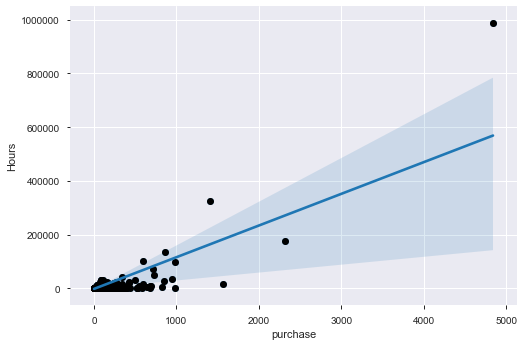

In [28]:
X = total_game['purchase']
Y = total_game['Hours'] #hours playing

plt.plot(X, Y, 'o', color='black')

sns.regplot(x='purchase', y = 'Hours', data = total_game)



In [22]:
#trying to see mean of hours per game:

#total_game_median= total_game.groupby('game-title').agg({'Hours': 'mean', 'purchase': 'mean'}).sort_values(by='Hours', ascending = False) #True
#total_game_median.head()



In [ ]:
best_games

In [9]:
#as the len of play and purshage are different, i need to see what heppens:

def play_count(x):
    return len([i for i in x if i == 'play'])
def purchase_count(x):
    return len([i for i in x if i == 'purchase'])

steam_data_ok= steam_data_user.groupby('game-title').agg({'behavior-name':[play_count, purchase_count]})
steam_data_ok.head(20)

behavior-name  \
                                                      play_count   
game-title                                                         
007 Legends                                                    1   
0RBITALIS                                                      3   
1... 2... 3... KICK IT! (Drop That Beat Like an...             5   
10 Second Ninja                                                2   
10,000,000                                                     1   
100% Orange Juice                                              9   
1000 Amps                                                      1   
12 Labours of Hercules                                         7   
12 Labours of Hercules II The Cretan Bull                      8   
12 Labours of Hercules III Girl Power                          3   
140                                                            5   
15 Days                                                        1   
16 Bit Arena                                                   0   
16bit Trader                                                   2   
1701 A.D. Gold Edition                                         0   
1701 A.D. Sunken Dragon                                        1   
18 Wheels of Steel American Long Haul                          1   
1953 - KGB Unleashed                                           0   
1953 NATO vs Warsaw Pact                                       1   
1954 Alcatraz                                                  0   

                                                                   
                                                   purchase_count  
game-title                                                         
007 Legends                                                     1  
0RBITALIS                                                       3  
1... 2... 3... KICK IT! (Drop That Beat Like an...              7  
10 Second Ninja                                                 6  
10,000,000                                                      1  
100% Orange Juice                                              10  
1000 Amps                                                       2  
12 Labours of Hercules                                         10  
12 Labours of Hercules II The Cretan Bull                      12  
12 Labours of Hercules III Girl Power                           6  
140                                                            13  
15 Days                                                         1  
16 Bit Arena                                                    7  
16bit Trader                                                    3  
1701 A.D. Gold Edition                                          1  
1701 A.D. Sunken Dragon                                         1  
18 Wheels of Steel American Long Haul                           2  
1953 - KGB Unleashed                                            4  
1953 NATO vs Warsaw Pact                                        1  
1954 Alcatraz                                                   3

In [26]:
steam_data_ok.equals(steam_data_ok['behavior-name'])

False

In [ ]:
def play_count(x):
    return len([i for i in x if i == 'play'])
def purchase_count(x):
    return len([i for i in x if i == 'purchase'])

steam_data_ok= steam_data_user.groupby('game-title').agg({'behavior-name':[play_count, purchase_count]})
steam_data_ok.head(20)

In [ ]:
# There are games that were bought but no played. 